### 4.1 The NumPy ndarray: A Multidimensional Array Object

#### 4.1.1 Creating ndarrays

In [3]:
import numpy as np

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)  # convert list to array

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)  # convert list of lists to array

arr1, arr2

(array([6. , 7.5, 8. , 0. , 1. ]),
 array([[1, 2, 3, 4],
        [5, 6, 7, 8]]))

In [6]:
arr2.ndim, arr2.shape, arr2.dtype  # show array dimension (1D, 2D, 3D), array shape (nrow, ncol), array data type (int, float, etc.)

(2, (2, 4), dtype('int32'))

In [9]:
np.zeros(10)
np.ones((3, 6))
arr = np.empty((3, 2, 1))  # matrix/array initialization
arr[:] = np.nan  # initialize array with NaN
arr

array([[[nan],
        [nan]],

       [[nan],
        [nan]],

       [[nan],
        [nan]]])

In [4]:
np.arange(15), np.arange(1, 11.), np.arange(1, 11, 2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([1, 3, 5, 7, 9]))

#### 4.1.2 Data Types for ndarrays

In [12]:
arr1 = np.arange(1, 4, dtype=float)
arr2 = np.arange(1, 4, dtype=int)
arr3 = np.arange('2020-01-01', '2020-01-11', dtype='datetime64')
arr1.dtype, arr2.dtype, arr3.dtype

(dtype('float64'), dtype('int32'), dtype('<M8[D]'))

In [16]:
# convert/cast datatype
arr = np.arange(1, 6)
arr.astype(float)
float_arr = arr.astype(float)
arr.dtype, float_arr.dtype

(dtype('int32'), dtype('float64'))

In [17]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(int)

array([ 3, -1, -2,  0, 12, 10])

In [22]:
numeric_strings = np.array(['1.25', '-9.6', '42'])
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [23]:
# use another array's dtype attribute
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50])
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

#### 4.1.3 Operations between Arrays and Scalars

In [25]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
# arithmetic operations are elementwise
arr+1, arr*arr, arr-arr, 1/arr, arr**.5

(array([[ 1.,  4.,  9.],
        [16., 25., 36.]]),
 array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[1.        , 0.5       , 0.33333333],
        [0.25      , 0.2       , 0.16666667]]),
 array([[1.        , 1.41421356, 1.73205081],
        [2.        , 2.23606798, 2.44948974]]),
 array([[2., 3., 4.],
        [5., 6., 7.]]))

#### 4.1.4 Basic Indexing and Slicing

In [82]:
# 1D vector
arr = np.arange(10)
arr[0], arr[5:8], arr[1:6:2]  # [start(inclusive):stop(exclusive):step]
arr[5:8] = 12  # modification propagate to the entire selection

In [56]:
# Array slice vs. List slice (important!)
arr_slice = arr[5:8]  # slice of an array is a view of the source array
arr_slice[1] = 12345  # modification of the view modifies the source array
arr_slice, arr

(array([   12, 12345,    12]),
 array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
            9]))

In [61]:
arr_slice_copy = arr[5:8].copy()  # a copy of the slice
arr_slice_copy[1] = 12
arr_slice_copy, arr

(array([12, 12, 12]),
 array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
            9]))

In [58]:
ls = list(range(10))
ls[5:8] = [12]*3    # no propagation, must have the same length
ls_slice = ls[5:8]  # slice of a list is a copy of the source list
ls_slice[1] = 12345  # modification of the elem does not affect the source list
ls_slice, ls

([12, 12345, 12], [0, 1, 2, 3, 4, 12, 12, 12, 8, 9])

In [63]:
# 2D matrix [[]]
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2], arr2d[2, :]  # 3rd row

(array([7, 8, 9]), array([7, 8, 9]))

In [64]:
arr2d[0][2], arr2d[0, 2]  # 1st row, 3rd col

(3, 3)

In [65]:
# 3D array [[[]]]
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.shape  # array number by row number by column number

(2, 2, 3)

In [66]:
arr3d[0], arr3d[:, 0, :], arr3d[:, :, 0]  # 1st array, 1st row, 1st col
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [67]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [68]:
arr3d[1, 0]  # 2nd array, first row

array([7, 8, 9])

In [83]:
# negative index
# arr[-1]  # last element
# reverse order
arr[::-1]

array([ 9,  8, 12, 12, 12,  4,  3,  2,  1,  0])

In [75]:
# Indexing with slices
# arr[0:-1]  # all elements excluding the last
# arr[1:6]  # 2nd to 6th element
# omittion before/after colon : means from the start/to the end
# arr2d[:2]  # the first two rows
# arr2d[:-1]  # all rows except the last
arr2d[-2:]  # the last two rows
# arr2d[:2, 1:]  # the first two rows, cols from second to end
# arr2d[1, :2]  # mixing integer index and slices gives lower dimension slices
# arr2d[:, :1]  # the first col
# arr2d[:2, 1:] = 0  # single value propagation to the selection

array([[4, 5, 6],
       [7, 8, 9]])

#### 4.1.5 Boolean Indexing

In [78]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

# names == 'Bob'
# data[names == 'Bob']  # filter rows
# data[names == 'Bob', :]  # equivalent above
# data[np.array([True, False, False, True, False, False, False])]  # above
# data[:, np.array([True, False, False, True])]  # filter cols
# data[names == 'Bob', 2:]  # fiilter rows & cols
# data[names == 'Bob', 3]
# names != 'Bob'
data[(names != 'Bob')], data[~(names == 'Bob')]

# mask = (names == 'Bob') | (names == 'Will')
# data[mask]

# data[data < 0] = 0
# data[data != 0] = np.nan
data[np.isnan(data)] = 0
# data[names != 'Joe'] = 7

(array([[ 0.23440277,  0.50625853,  0.82643934,  1.69252751],
        [-0.15328094,  1.61768701,  0.62585749,  0.16674748],
        [ 0.681843  ,  0.37901256,  1.24884549, -2.24100275],
        [-1.26006877, -0.38757339,  1.23076048,  0.6810079 ],
        [-0.14679415,  0.9970424 ,  0.99970423, -0.33051553]]),
 array([[ 0.23440277,  0.50625853,  0.82643934,  1.69252751],
        [-0.15328094,  1.61768701,  0.62585749,  0.16674748],
        [ 0.681843  ,  0.37901256,  1.24884549, -2.24100275],
        [-1.26006877, -0.38757339,  1.23076048,  0.6810079 ],
        [-0.14679415,  0.9970424 ,  0.99970423, -0.33051553]]))

#### 4.1.6 Fancy Indexing

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr[[4, 3, 0, 6]]  # rearrange rows in a particular order
arr[[-3, -5, -7]]  # rows from the end

arr2 = np.empty((8, 4))
for i in range(4):
    arr2[:, i] = i
arr2[:, :2]  # the first two cols
arr2[:, [1, 3, 0, 2]]  # cols in a particular order
arr2[:, ::-1]  # cols in an inverse order

# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
arr[[1, 5, 7, 2], [0, 3, 1, 2]]  # select 4 corner elements (1,0), (5,3), (7,1), (2,2)
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]  # select subset of rows and cols
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]  # alternatively

#### 4.1.7 Transposing Arrays and Swapping Axes

In [80]:
# arr = np.arange(15).reshape((3, 5))
# arr.T, arr.transpose()
# arr = randn(6, 3)
# np.dot(arr.T, arr)
arr = np.arange(24).reshape((2, 3, 4))
arr, arr.transpose((1, 0, 2))
# arr.swapaxes(0, 1)

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 array([[[ 0,  1,  2,  3],
         [12, 13, 14, 15]],
 
        [[ 4,  5,  6,  7],
         [16, 17, 18, 19]],
 
        [[ 8,  9, 10, 11],
         [20, 21, 22, 23]]]))

### 4.2 Universal Functions: Fast Element-wise Array Functions

In [112]:
# arr = np.arange(9).reshape((3, 3))
# np.sqrt(arr), np.exp(arr)
x = np.random.randn(8)
y = np.random.randn(8)
# x, y, np.maximum(x, y)  # return larger elements
x > y, np.greater(x, y)  # return logical 1 0 of comparison results
# arr = randn(7) * 5
# divmod(7.5, 2)  # quotient and remainder part of a number (float is OK)
# np.modf(arr)  # fractional and integral part of floating point array

(array([ True,  True,  True,  True, False, False,  True, False]),
 array([ True,  True,  True,  True, False, False,  True, False]))

### 4.3 Data Processing Using Arrays

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

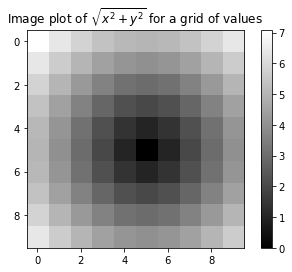

In [87]:
import matplotlib.pyplot as plt

points = np.arange(-5, 5, 1)  # 10 equally spaced points
xs, ys = np.meshgrid(points, points)  # xs: copy points by rows, ys: by cols
z = np.sqrt(xs ** 2 + ys ** 2)
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

#### 4.3.1 Expressing Conditional Logic as Array Operations

In [90]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
# result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]
result = np.where(cond, xarr, yarr)
result
# arr = randn(4, 4)
# np.where(arr > 0, 2, -2)
# np.where(arr > 0, 2, arr)  # set only positive values to 2

array([1.1, 2.2, 1.3, 1.4, 2.5])

#### 4.3.2 Mathematical and Statistical Methods

In [ ]:
arr = np.random.randn(5, 4)
arr.mean(), np.mean(arr)  # array mean
arr.sum()  # array sum
arr.sum(axis=0), arr.sum(0)  # col sum
arr.mean(axis=1), arr.mean(1)  # row mean
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(0)  # col cumsum
arr.cumprod(1)  # row cumprod

#### 4.3.3 Methods for Boolean Arrays

In [ ]:
arr = np.random.randn(10)
(arr > 0).sum()  # Number of positive values
arr[arr > 0] = 0
arr.any()  # True if any of the elements of a evaluate is nonzero
arr.all()  # True if all of the elements of a evaluate is nonzero
bools = np.array([False, False, True, False])
bools.any()  # True if any of the elements of a evaluate to True
bools.all()  # True if all of the elements of a evaluate to True
arr2 = np.random.randn(3, 4)
arr2[arr2 > 0] = 0
arr2.any(axis=0)  # True if any cols contain nonzero elements

In [92]:
# Ex1: retrieve the index of rows containing zero(s)
arr2d = np.array([np.zeros(3), np.ones(3), np.arange(-1, 2)])
# np.where(~arr2d.all(1))
np.nonzero(~arr2d.all(1))  # Alternatively

# Ex2: filter rows with all zeros
# arr2d[~arr2d.any(1)]

(array([0, 2], dtype=int64),)

#### 4.3.4 Sorting

In [94]:
arr = np.random.randn(8)
arr, np.sort(arr), sorted(arr)  # sort array in place, copy and sort array, copy, sort and convert to list

array([-0.67339241, -0.58096307, -0.36206701,  0.2854969 ,  0.54669894,
        0.60181744,  0.60694625,  1.68222801])

In [ ]:
arr = np.random.randn(5, 3)
arr.sort(axis=1)  # sort by row
large_arr = randn(1000)
large_arr.sort()
np.sort(large_arr)  # create a copy and sort array
large_arr[int(0.05 * len(large_arr))]  # 5% quantile

#### 4.3.5 Unique and Other Set Logic

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)  # unique sorted values in an array
sorted(set(names))  # pure Python counterpart of np.unique()
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])
np.isin(values, [2, 3, 6])
np.setdiff1d(values, [2, 3, 6])

### 4.4 File Input and Output with Arrays

#### 4.4.1 Storing Arrays on Disk in Binary Format

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')

# store multiple arrays
arr1 = np.arange(3)
arr2 = np.arange(4)
np.savez('array_archive.npz', a=arr1, b=arr2)
arch = np.load('array_archive.npz')
arch['a'], arch['b']

#### 4.4.2 Saving and Loading Text Files

In [109]:
!type .\Scripts\array_ex.txt
arr = np.loadtxt('array_ex.txt', delimiter=',')
np.savetxt('array_ex.txt', arr, delimiter=',')

5.800520000000000120e-01,1.867300000000000071e-01,1.040716999999999892e+00,1.134411000000000058e+00
1.941630000000000023e-01,-6.369169999999999554e-01,-9.386590000000000211e-01,1.240939999999999960e-01
-1.264099999999999946e-01,2.686069999999999847e-01,-6.957240000000000091e-01,4.742799999999999794e-02
-1.484412999999999982e+00,4.176000000000000024e-03,-7.442029999999999479e-01,5.486999999999999690e-03
2.302868999999999833e+00,2.001310000000000033e-01,1.670237999999999889e+00,-1.881089999999999929e+00
-1.932300000000000129e-01,1.047233000000000080e+00,4.828029999999999822e-01,9.603340000000000209e-01


### 4.5 Linear Algebra

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y)  # equivalently np.dot(x, y)
np.dot(x, np.ones(3))

X = randn(5, 5)
mat = X.T.dot(X)
np.linalg.inv(mat)
mat.dot(np.linalg.inv(mat))
q, r = np.linalg.qr(mat)

### 4.6 Random Number Generation

In [ ]:
import random

# samples = np.random.normal(size=(4, 4))

N = 1000000
# Python built-in normalvariate (generate one random number at a time)
%timeit samples = [random.normalvariate(0, 1) for _ in range(N)]
# Numpy normal (generate array of random numbers much faster)
%timeit normal(size=N)

### 4.7 Example: Random Walks

In [ ]:
# Random walk python
position = 0
walk = [position]
steps = 10
for i in range(steps):
    step = 1 if random.randint(0, 2) else -1  # if randint(0, 2) means if True/False
    position += step
    walk.append(position)

# Random walk numpy
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)  # 0 inclusive, 2 exclusive
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min(), walk.max()
(np.abs(walk) >= 10).argmax()  # number of steps taken for walk >= 10

#### 4.7.1 Simulating Many Random Walks at once

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks.min(1), walks.max(1)
hits30 = (np.abs(walks) >= 30).any(1)  # check if any walk >= 30
hits30.sum()  # number of Trues
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))